In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Вычисление длины волны
h = 1000
l = h * np.sin(40.8  * np.pi / 180.)
print("l =", l)

l = 653.4206039901054


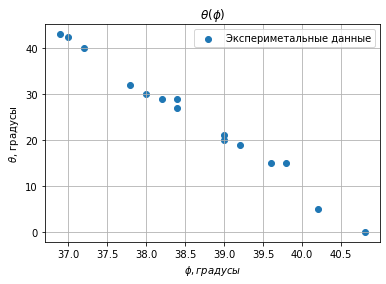

In [13]:
#Первый эксперимент, первая картинка
phi = [40.8, 39, 39.6, 38, 38.2, 37.8, 39.2, 38.4, 40.2, 39.8, 37.2, 39.0, 37.0, 38.4, 36.9]
theta = [0, 21, 15, 30, 29, 32, 19, 29, 5, 15, 40, 20, 42.5, 27, 43]
plt.figure(figsize=(6, 4))
plt.scatter(phi, theta, label="Экспериметальные данные")
plt.grid()
plt.legend()
plt.title(r"$\theta(\phi)$")
plt.ylabel(r"$\theta$, градусы")
plt.xlabel(r"$\phi, градусы$")
plt.savefig("Graph1.png")

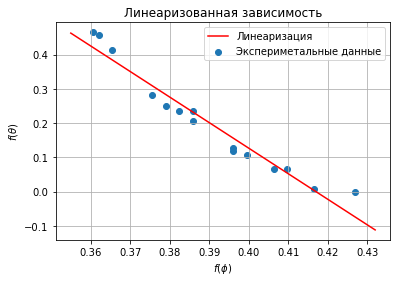

In [14]:
#Первый эксперимент, вторая картинка
def linearize(x):
    return np.sin(x)**2
plt.figure(figsize=(6, 4))
plt.scatter(linearize(np.radians(phi)), linearize(np.radians(theta)), label="Экспериметальные данные")
y = np.polyfit(linearize(np.radians(phi)), linearize(np.radians(theta)), 1)
y = np.poly1d(y)
x = np.linspace(0.355, 0.432, 50)
plt.plot(x, y(x), color="red", label="Линеаризация")
plt.title(r"Линеаризованная зависимость")
plt.xlabel(r"$f(\phi)$")
plt.ylabel(r"$f(\theta)$")
plt.legend()
plt.grid()
plt.savefig("Graph2.png")

In [15]:
#Вычисление D и n
print(y)
D = np.sqrt(h**2 * y[0] / 4)
print("D =", D / 4)
n = np.sqrt(- h**2 * y[1] / (4 * D**2))
print("n =", np.sqrt(- h**2 * y[1] / (4 * D**2)))

 
-7.463 x + 3.112
D = 220.50991216623385
n = 1.5485984592576048


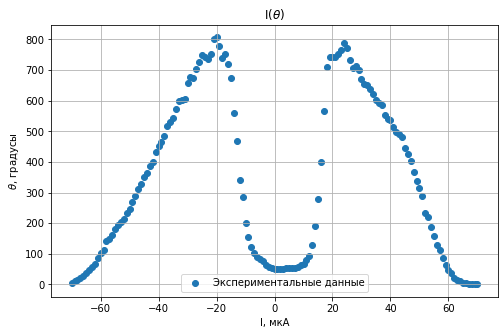

In [16]:
#Второй эксперимент, первая картинка
theta = [float(i) for i in range(-70, 71)]
I = [6, 11, 15, 21, 28, 38, 48, 58, 66, 85, 103, 114, 143, 150, 162, 182, 195, 203, 215, 234, 245, 270, 290, 311, 329, 350, 364, 387, 400, 433, 451, 466, 486, 516, 532, 542, 573, 600, 602, 607, 657, 676,  673, 705, 726, 748, 742, 737, 753, 803, 807, 779, 740, 752, 721, 674, 561, 468, 340, 286, 200, 155, 122, 103, 89, 82, 76, 62, 56, 54, 52, 52, 52, 52, 53, 53, 54, 55, 57, 62, 67, 81, 93, 130, 191, 279, 401, 565, 710, 743, 742, 742, 752, 766, 788, 772, 732, 707, 713, 700, 670, 655, 650, 637, 621, 603, 594, 585, 555, 541, 536, 515, 498, 490, 480, 444, 425, 402, 367, 338, 315, 289, 233, 219, 188, 157, 128, 112, 86, 65, 48, 36, 22, 15, 12, 6, 5, 0, 0, 0, 0]
plt.figure(figsize=(8, 5))
plt.scatter(theta, I, label="Экспериментальные данные")
plt.title(r"I($\theta$)")
plt.xlabel(r"I, мкА")
plt.ylabel(r"$\theta$, градусы")
plt.legend()
plt.grid()
plt.savefig("Graph3.png")

dth = 29.0


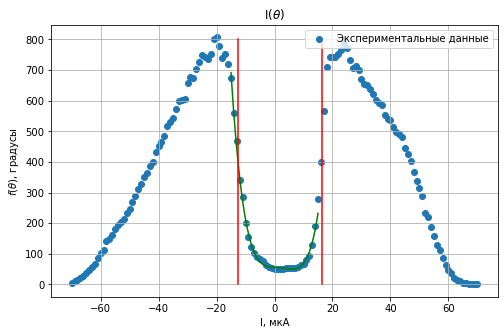

In [17]:
#Второй эксперимент, определение ширины ямы
from itertools import repeat
theta = [float(i) for i in range(-70, 71)]
I = [6, 11, 15, 21, 28, 38, 48, 58, 66, 85, 103, 114, 143, 150, 162, 182, 195, 203, 215, 234, 245, 270, 290, 311, 329, 350, 364, 387, 400, 433, 451, 466, 486, 516, 532, 542, 573, 600, 602, 607, 657, 676,  673, 705, 726, 748, 742, 737, 753, 803, 807, 779, 740, 752, 721, 674, 561, 468, 340, 286, 200, 155, 122, 103, 89, 82, 76, 62, 56, 54, 52, 52, 52, 52, 53, 53, 54, 55, 57, 62, 67, 81, 93, 130, 191, 279, 401, 565, 710, 743, 742, 742, 752, 766, 788, 772, 732, 707, 713, 700, 670, 655, 650, 637, 621, 603, 594, 585, 555, 541, 536, 515, 498, 490, 480, 444, 425, 402, 367, 338, 315, 289, 233, 219, 188, 157, 128, 112, 86, 65, 48, 36, 22, 15, 12, 6, 5, 0, 0, 0, 0]
plt.figure(figsize=(8, 5))
y = np.linspace(0, 800, 100)
x = np.linspace(-15, 15, 100)
z = np.polyfit(theta[55:85], I[55:85], 4)
z = np.poly1d(z)
plt.plot(x, z(x), color="green")
x1 = [-12.5 for i in range(100)]
x2 = [16.5 for i in range(100)]
plt.plot(x1, y, color="red")
plt.plot(x2, y, color="red")
plt.scatter(theta, I, label="Экспериментальные данные")
plt.title(r"I($\theta$)")
plt.xlabel(r"I, мкА")
plt.ylabel(r"$f(\theta)$, градусы")
plt.legend()
plt.grid()
print("dth =", 16.5 + 12.5)

In [18]:
#Длина волны минимума пропускания
l_min = l * np.sqrt(n**2 - (np.sin(3  * np.pi / 180.))**2) / n
print("l_min =", l_min)

l_min = 653.0473456063962


In [19]:
#Разница показателей преломления
l_min1 = l * np.sqrt(n**2 - (np.sin(22  * np.pi / 180.))**2) / n
l_min2 = l * np.sqrt(n**2 - (np.sin(0  * np.pi / 180.))**2) / n
print(n * np.pi * 2 / 2 * np.abs(l_min1 - l_min2) / l)

0.1444871709378018
